In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')
from  sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Класс DecisionTreeClassifier в Scikit-learn
Основные параметры класса sklearn.tree.DecisionTreeClassifier:

max_depth – максимальная глубина дерева


max_features - максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)


min_samples_leaf – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как мимимум для 5 объектов


Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью кросс-валидации, про нее чуть ниже.

## Оценка и улучшение качества модели

# Кросс-валидация



Практически всегда от моделей машинного обучения требуется указать их точность. Для расчета точности необходимо

1) обучить модель на тренировочном датасете
2) предсказать результаты на тестовом датасете

3) сравнить правильные данные с предсказанными
Данная процедура проста, но в зависимости от разбиения на обучающий датасет и тестовый датасет мы получим немного разные значения. И какой же результат более правильный?

Правильного нет, ведь точность классификатора само по себе понятие относительное. Но интуитивно понятно, что для лучшей оценки необходимо провести процедуру 1-2-3 как можно большее количество раз.


И вот как раз для оценки точности классификатора и придумали кросс-валидацию. Или K-fold cross-validation.

Идея проста, весь датасет делится на N частей. На каждой итерации N-1 часть идёт на train, и одна на test.

В sklearn для этого есть специальный метод cross_val_score

Итак:о сновная задача обучаемых алгоритмов - способность работать на новых данных. Для проверки обобщающей способности модели наиболее часто используются разбиение тренировочной выборки на две части: собственно тренировочная (в которую попадает обычно 60-80% от всей выборки) и отложенная (проверочная, валидационная). Это разбиение может быть сделано несколькими способами:

1) "вырезаем" непрерывную часть выборки нужного размера, остальные элементы используются для обучения

2) выбираем некоторое количество элементов случайным образом и используем остальные для обучения

3) делаем несколько последовательных выборок (непрерывных или случайных), чтобы улучшить нашу оценку моделей за счет осреднения (кросс-валидация - cross validation)

Кросс-валидация (K-Fold)


используется для:

- выбора модели

- настройки параметров модели

- оценки полезности признаков Основная проблема - высокая "цена" на больших выборках
Первые два способа реализуются sklearn.model_selection.train_test_split, вторые - model_selection.KFold



In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
iris = load_iris()


In [10]:
X, y = iris.data, iris.target

In [11]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# разобъем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# создаем экземпляр модели и подгоняем его на обучающем наборе
DT = DecisionTreeClassifier(max_depth=35).fit(X_train, y_train)
# оцениваем качество модели на тестовом наборе
print("Правильность на обуч наборе: {:.2f}".format(DT.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(DT.score(X_test, y_test)))

Правильность на обуч наборе: 1.00
Правильность на тестовом наборе: 0.97


Найдем долю правильных ответов полученного алгоритма на обучающей выборке (в процентах). 

In [12]:
y_pred_train = DT.predict(X_train)
accuracy_score(y_pred_train, y_train)

1.0

Теперь найдите долю правильных ответов полученного алгоритма на тестовой выборке (в процентах). Ответ округлите до двух знаков после запятой.

In [13]:
y_pred = DT.predict(X_test)
accuracy_score(y_pred, y_test)

0.9736842105263158

### Перекрестная проверка

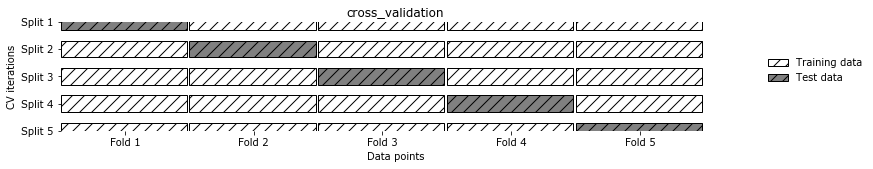

In [14]:
mglearn.plots.plot_cross_validation()

#### Перекрестная проверка в scikit-learn - 5 кратная cv=none

In [15]:
DT = DecisionTreeClassifier(max_depth=35)


 передаем классификатор, iris и кол-во фолдов=5

In [16]:
scores = cross_val_score(DT, iris.data, iris.target, cv=5)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 0.96666667 0.9        1.         1.        ]


In [17]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.97


 по сравнению с train_test_split мы получим более точную оценку качества классификатора, т.к. провели эксперимент N раз (в нашем случае 5 раз).
Да, пришлось потратить в 5 раз больше времени по сравнению с train_test_split, но когда данных не очень много — это оправдано.

In [18]:

scores = cross_val_score(DT, iris.data, iris.target)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.98039216 0.92156863 0.97916667]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [19]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.96


### Преимущества перекрестной проверки

### Стратифицированная k-блочная перекрестная проверка и другие стратегии

Однако не всегда удаётся воспользоваться методом cross_val_score, например если хотим что-то ещё подсчитать в это время.
Для этого есть более гибкий метод KFold.

Kfold часто используют не только для оценки точности классификатора, но и например для контроля переобучения для классификатора.

Для многих моделей очень важно знать, в какой момент начинается переобучение. Таким образом можно обучить 10 классификаторов с контролем переобучения и потом усреднить их предсказания. Это может дать дать лучий результат, чем если обучить одну модель сразу на всех данных, без контроля переобучения.


In [20]:
документация: http://scikit-learn.org/stable/modules/cross_validation.html

SyntaxError: invalid syntax (<ipython-input-20-5ee5e86eedd3>, line 1)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Метки ирисов:\n{}".format(iris.target))

In [ ]:
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation

In [21]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [22]:
print("Значения правильности перекрестной проверки:\n{}".format(
      cross_val_score(DT, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         1.         0.83333333 0.93333333 0.76666667]


In [23]:
kkfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(DT, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         1.         0.86666667 0.93333333 0.8       ]


In [24]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(DT, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.98 0.94 0.96]



Обратите внимание на аргументы:

shuffle=True — без него фолды будут формироваться из последовательно идущих объектов, что нехорошо — в этом поможет убедиться задание в части 2;
random_state — если этот параметр не выставить, то после каждого запуска команды будет генерироваться новое разбиение на фолды; крайне желательно, чтобы ваши эксперименты были в точности воспроизводимы — это упрощает исследования.

#### Перекрестная проверка с исключением по одному

In [25]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(DT, iris.data, iris.target, cv=loo)
print("Количество итераций cv: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций cv:  150
Средняя правильность: 0.94


#### Перекрестная проверка со случайными перестановками при разбиении

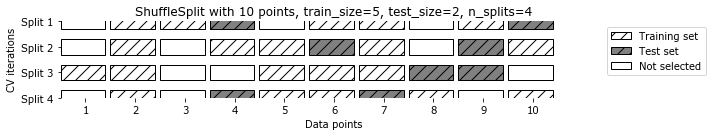

In [26]:
mglearn.plots.plot_shuffle_split()

In [27]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(DT, iris.data, iris.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.92       0.96       0.93333333 0.90666667 0.98666667 0.93333333
 0.97333333 0.96       0.92       0.94666667]


#### Опасность переобучения параметров и проверочный набор данных

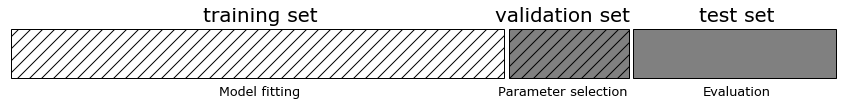

In [28]:
mglearn.plots.plot_threefold_split()

In [29]:
from sklearn.svm import SVC
# разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих 
# и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 84 размер проверочного набора: 28 размер тестового набора: 38

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


Больше стратегий проведения кросс-валидации доступно здесь: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators

In [30]:
# Подбор параметров по сетке

ПодбеРем с помощью кросс-валидации оптимальные гиперпараметры алгоритма. Выбираем из следующих наборов:

max_depth: [3, 4, 5, 6, 7, 8, 9, 10, None]

max_features: ['auto', 'log2', None]

min_samples_leaf: range(1, 10)

min_samples_split: range(2, 10)

criterion: ['gini', 'entropy']

В этом вам поможет метод sklearn.model_selection.GridSearchCV. Подробнее о том, какие параметры и методы в нем используются, и о примерах работы с ним можно прочитать в документации.

1) Создайте решающее дерево - не забудьте поставить random_state=13.

2) Задайте param_grid - сетку (словарь) гиперпараметров и их значений, по которой будет проходить метод.

3) Вызовите метод GridSearchCV - в качестве параметра estimator задайте решающее дерево из первого шага, param_grid - сетку из второго. Задайте параметр cv=5, чтобы кросс-валидация проходила по 5 фолдам. Также задайте параметр scoring='accuracy', чтобы оценка качества моделей на кросс-валидации проходила с помощью доли правильных ответов. Запустите метод на обучающей выборке с помощью fit.

4) Выведите лучшие параметры с помощью атрибута best_params_.

In [31]:

gs = GridSearchCV(DecisionTreeClassifier(random_state=13),
                  param_grid = {'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, None],
                                'max_features' : ['auto', 'log2', None],
                                'min_samples_leaf' : range(1, 10),
                                'min_samples_split' : range(2, 10),
                                'criterion' : ['gini', 'entropy']},
                  cv=5, scoring='accuracy'
                  ).fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:

gs.best_params_


{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Какое лучшее усредненное значение доли правильных ответов получилось на кросс-валидации (для оптимальных значений гиперпараметров)? Вам поможет атрибут best_score_. Ответ округлите до двух знаков после запятой и дайте в процентах.

In [33]:
gs.best_score_

0.9880952380952381

Найдите долю правильных ответов решающего дерева с подобранными оптимальными значениями гиперпараметров на обучающей выборке (в процентах). Ответ округлите до двух знаков после запятой.

In [34]:

accuracy_score(gs.predict(X_train, y_train))

TypeError: predict() takes 2 positional arguments but 3 were given

# Прогнозирование вероятностей классов

Решающее дерево позволяет предсказывать не только классы, но и вероятности классов - с помощью метода predict_proba. 

Посмотрим на вероятности классов полученного решающего дерева и посчитаем значение AUC-ROC. Ответ округлим до двух знаков после запятой

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = gs.predict_proba(X_test)
#print(y_pred_proba)
roc_auc_score(y_test, y_pred_proba[:, 1])

Какой признак является самым важным по мнению полученного решающего дерева? Чтобы это проверить, вам поможет атрибут feature_importances_.

In [ ]:
clf_best = DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=3, min_samples_split=9, random_state=13).fit(X_train, y_train)

In [ ]:
clf_best.feature_importances_

In [ ]:
pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf_best.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)